In [3]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

from scipy import stats
import math

from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [11]:
data_attach_notnull = pd.read_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')
data_attach_notnull.drop(['所辖乡镇','星期','涉外事故','现场','行政区划','现场','公里数'],axis=1,inplace=True)

In [14]:
data_attach_notnull.columns
print(len(data_attach_notnull))

132


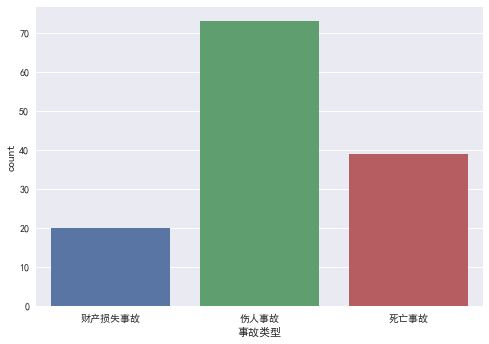

In [12]:
sns.countplot(data_attach_notnull['事故类型'])

In [5]:
#生成训练集和测试集


data_attach_notnull['index'] = range(len(data_attach_notnull))
data_attach_notnull_test = data_attach_notnull.sample(frac=0.2,replace=False)
#获取训练集
index = ~data_attach_notnull.index.isin(data_attach_notnull_test['index'])
data_attach_notnull_train = data_attach_notnull[index]


#转换为数字
data_attach_notnull.drop(['index'],axis=1,inplace=True)
data_attach_notnull_train.drop(['index'],axis=1,inplace=True)
data_attach_notnull_test.drop(['index'],axis=1,inplace=True)
columnsToNum = list(data_attach_notnull_train.columns)

set_toNum = pd.DataFrame()
for i in columnsToNum:
    set_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])


trainSet_toNum = pd.DataFrame()
for i in columnsToNum:
    trainSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_train[i])

# columnsToNum = list(data_attach_notnull_test.columns)
testSet_toNum = pd.DataFrame()
for i in columnsToNum:
    testSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_test[i])

del data_attach_notnull_train,data_attach_notnull_test,data_attach_notnull

#统一训练集、测试集格式
train_features = trainSet_toNum.drop(['事故类型'],axis=1).columns

x_all =np.array(set_toNum.drop(['事故类型'],axis=1)) 
y_all = np.array(set_toNum['事故类型'])
y = np.zeros((len(y_all),len(set_toNum.groupby('事故类型')) ))
for i in range(len(y_all)):
    y[i][y_all[i]] = 1
y_all = np.mat(y)
x_all = np.mat(x_all)
# y_all = np.mat(y_all)

x_train =np.array(trainSet_toNum.drop(['事故类型'],axis=1)) 
y_train = np.array(trainSet_toNum['事故类型'])
y = np.zeros((len(y_train),len(trainSet_toNum.groupby('事故类型')) ))
for i in range(len(y_train)):
    y[i][y_train[i]] = 1
y_train = np.mat(y)
x_train = np.mat(x_train)
# y_train = np.mat(y_train)


x_test =np.array(testSet_toNum.drop(['事故类型'],axis=1)) 
y_test = np.array(testSet_toNum['事故类型'])
y = np.zeros((len(y_test),len(testSet_toNum.groupby('事故类型')) ))
for i in range(len(y_test)):
    y[i][y_test[i]] = 1
y_test = np.mat(y)
x_test = np.mat(x_test)
# y_test = np.mat(y_test)


del y,trainSet_toNum,testSet_toNum

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
forest = RandomForestClassifier(max_features='sqrt',random_state=10,oob_score=True)
forest.fit(x_all,y_all)
print(forest.oob_score_)

0.79797979798


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
#turn n_estimator
param_test1 = {'n_estimators':list(range(20,200,10))}

forest = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt',random_state=10),\
                     param_grid=param_test1,scoring='roc_auc',cv=5)
forest.fit(x_all,y_all)
forest.grid_scores_,forest.best_params_,forest.best_score_#cv_results_

# forest = RandomForestClassifier(n_estimators=115,)
# forest.fit(x_train,y_train)
# print (forest.oob_score_)
# y_pred= forest.predict(x_test)
# print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_pred) )

In [ ]:
#n_estimators=20，
#'max_depth':list(range(2,18,1))
param_test2 = {'min_samples_split':list(range(2,30,2))}#, 
forest = GridSearchCV(estimator=RandomForestClassifier(n_estimators=180,\
                                                    max_features='sqrt',oob_score=True,\
                                                    random_state=10),\
                     param_grid = param_test2,scoring='roc_auc',cv=5,iid=False)
forest.fit(x_all,y_all)
forest.grid_scores_,forest.best_params_,forest.best_score_
#max_depth,min_samples_split使用默认值

In [ ]:
#测试oob_score_
rf1 = RandomForestClassifier(n_estimators= 180,max_features='sqrt' ,min_samples_split=2,oob_score=True, random_state=10)
rf1.fit(x_all,y_all)
print (rf1.oob_score_)

In [ ]:
param_test3 = {'min_samples_split':list(range(2,10,1)),\
               'min_samples_leaf':list(range(1,10,1))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 180,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(x_all,y_all)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {'max_features':list(range(1,15,1))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 180,\
                                    max_features='sqrt' ,min_samples_leaf=1, min_samples_split=2,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(x_all,y_all)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [7]:
#测试oob_score_
rf1 = RandomForestClassifier(n_estimators= 100,\
                             max_features='sqrt' ,min_samples_leaf=1, min_samples_split=2,\
                             oob_score=True, random_state=10)
rf1.fit(x_all,y_all)
print (rf1.oob_score_)

0.843434343434


In [8]:
#test
# np.argmax(rf1.predict(x_test),axis=1)
# np.mat(testSet_toNum_y)
# np.argmax(y_test,axis=1,).reshape( (1,len(np.argmax(y_test,axis=1,))) )


corr_pre_test = np.equal(np.argmax(rf1.predict(x_all),axis=1),\
                    np.argmax(y_all,axis=1,).reshape( (1,len(np.argmax(y_all,axis=1,))) )\
                   )
acc_test = np.mean(corr_pre_test)

print('测试集准确率：%s'%acc_test)

测试集准确率：0.984848484848


 1) 交通信号方式（控制）                     0.108561
 2) 路侧防护设施类型                       0.095822
 3) 中央隔离设施                         0.091041
 4) 能见度                            0.080579
 5) 道路物理隔离                         0.076298
 6) 道路类型                           0.070012
 7) 路面附着系数                         0.064648
 8) 路口路段类型                         0.052682
 9) 是否节假日                          0.049305
10) 照明条件                           0.043221
11) 是否白天                           0.037759
12) 路面结构                           0.037153
13) 在道路横断面位置                       0.030706
14) 路表情况                           0.028962
15) 天气                             0.028636
16) 公路行政等级                         0.026475
17) 交通标志标线完善                       0.022573
18) 路面状况                           0.020812
19) 地形                             0.013895
20) 道路线型                           0.010466
21) 事故多发点段                         0.003651
22) 道路安全属性                         0.002687
23) 长下坡路段                       

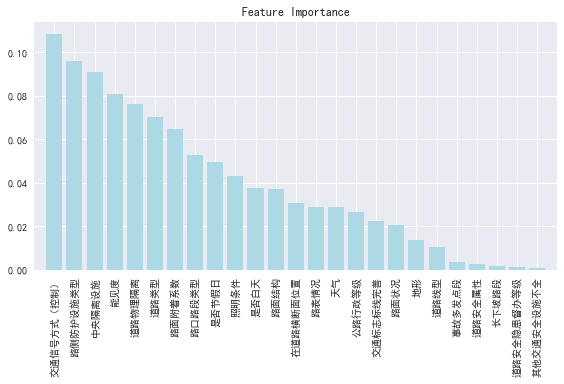

In [9]:
importances = rf1.feature_importances_
indice = np.argsort(importances)[::-1]#按照索引对应值的大小对索引排序
for i in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(i+1, 30, train_features[indice[i]], importances[indice[i]]))
    
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]),
       importances[indice],
       color='lightblue',
       align='center')
plt.xticks(range(x_train.shape[1]),
          train_features[indice],
           rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()